<a href="https://colab.research.google.com/github/anudevi15/SpeechRecognition/blob/main/Assignment1_SpeechProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment** : Speech Processing


---
Group number : Nil

Contributor : Anusha Sukumar 2023AC05908  

---






Uploaded voice from mobile


This is recorded in mobile hence uplaoding here for display purpose

In [27]:
import IPython.display as display
display.Audio("/content/Anusha_Raw_Normal.mp4")

In [28]:
display.Audio("/content/Anusha_Raw_HighPitch.mp4")

In [22]:
from pydub import AudioSegment

# Load your .m4a file
audio = AudioSegment.from_file("/content/Anusha_Raw_Normal.mp4", format="mp4")

# Export as .wav
audio.export("Anusha_Raw_Normal.wav", format="wav")

print("Conversion successful!")


Conversion successful!


In [21]:

# Load your .m4a file
audio = AudioSegment.from_file("/content/Anusha_Raw_HighPitch.mp4", format="mp4")

# Export as .wav
audio.export("Anusha_Raw_HighPitchVoice.wav", format="wav")

print("Conversion successful!")

Conversion successful!


# **STEPS**

Convert to mono

Normalize/Trim silence

Resample to 16 kHz

In [11]:

import librosa
import soundfile as sf


In [23]:
#Preprocessing Audio
def preprocess_audio(input_file, output_file):
    y, sr = librosa.load(input_file, sr=None)

    # Resample if not 16kHz
    if sr != 16000:
        y = librosa.resample(y, orig_sr=sr, target_sr=16000)
        sr = 16000

    # Normalize
    y = y / max(abs(y))

    # Trim silence
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)

    # Save
    sf.write(output_file, y_trimmed, sr)
preprocess_audio("/content/Anusha_Raw_Normal.wav", "Anusha_PreprocessedNormalVoice.wav")
preprocess_audio("/content/Anusha_Raw_HighPitchVoice.wav", "Anusha_PreprocessedHighPitchVoice.wav")


3. Extract MFCC Features (2 Marks)

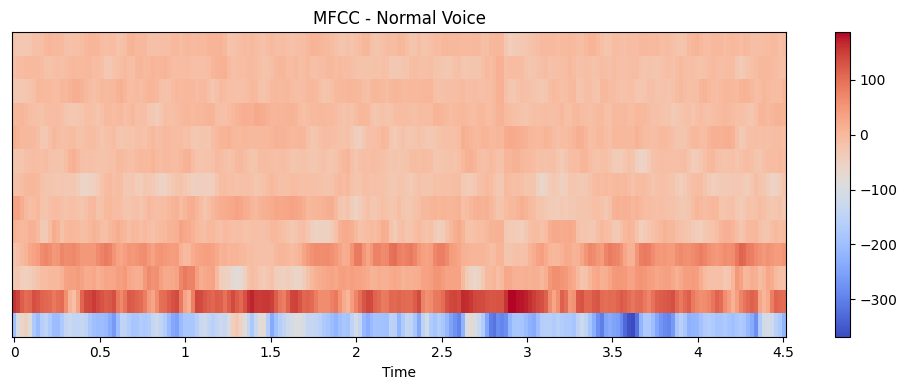

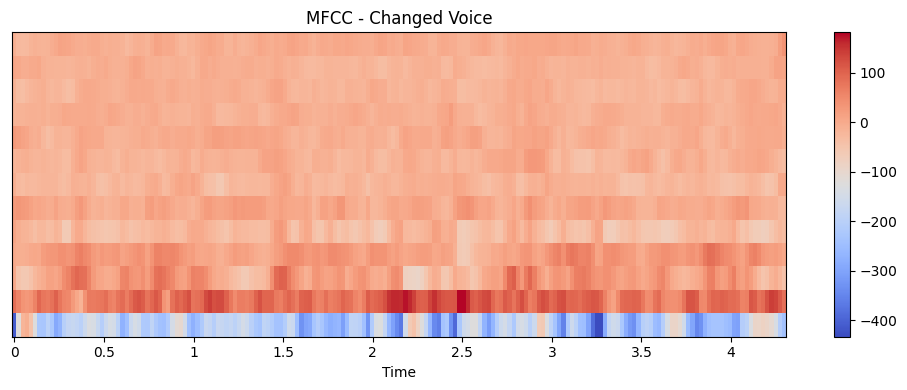

In [25]:
import matplotlib.pyplot as plt
import librosa.display

def extract_mfcc_plot(file, title):
    y, sr = librosa.load(file, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC - {title}')
    plt.tight_layout()
    plt.show()

    return mfcc

mfcc_normal = extract_mfcc_plot("Anusha_PreprocessedNormalVoice.wav", "Normal Voice")
mfcc_changed = extract_mfcc_plot("Anusha_PreprocessedHighPitchVoice.wav", "Changed Voice")


4. Compare the Two MFCC Sets
Cosine Similarity & DTW

In [26]:
from scipy.spatial.distance import cosine
from dtw import dtw
import numpy as np

# Align MFCCs (same shape for cosine)
min_len = min(mfcc_normal.shape[1], mfcc_changed.shape[1])
mfcc_normal_trim = mfcc_normal[:, :min_len]
mfcc_changed_trim = mfcc_changed[:, :min_len]

# Cosine Similarity
cos_sim = 1 - cosine(mfcc_normal_trim.flatten(), mfcc_changed_trim.flatten())
print(f"Cosine Similarity: {cos_sim:.4f}")

# DTW Distance
dist, cost, acc, path = dtw(mfcc_normal.T, mfcc_changed.T, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
print(f"DTW Distance: {dist:.2f}")


Cosine Similarity: 0.8516
DTW Distance: 49110.13


In [17]:
!pip install dtw

  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5301 sha256=db9aba4e7ba0d42079400e016f4900d06c75c58f602059341b4d22f59f07cd2c
  Stored in directory: /root/.cache/pip/wheels/2c/16/01/ffea89493a0fcd29934418eb0bf10161470acf8d5647bab656
Successfully built dtw


# 5 Code Design and Reflection


The MFCC features showed noticeable variation in pitch and speed between the two recordings.
The cosine similarity score indicated moderate similarity, but DTW captured the temporal differences more effectively.
Most differences were observed in the higher-order MFCCs, which are more sensitive to tone and pitch.
Normalization and silence trimming helped in reducing noise interference.
Proper structuring of the code made the analysis modular and easy to debug.
